### Spe carte de champ électrique

coding: utf8

Sauf mention explicite du contraire par la suite, ce travail a été fait par Jean-Julien Fleck, professeur de physique/IPT en PCSI1 au lycée Kléber. 

Vous êtes libres de le réutiliser et de le modifier selon vos besoins.

Programme proposé par Antoine Senger (MP, Lycée Poincaré, Nancy) afin de visualiser les cartes de champ et de potentielle pour des charges ponctuelles en 2D. On prend $\frac{1}{(4 \pi \epsilon_0)}$ $ = 1$, cela ne change pas l'allure des 
cartes.

In [3]:
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

N = 4;  nombre de charges

q = np.array([-1,-1,1,1]) ;  valeurs des charges

xq = np.array([-0.5,0.5,-0.5,0.5]) ; abscisses des charges

yq = np.array([-0.5,0.5,0.5,-0.5]) ; ordonnées des charges


In [4]:
N = 4
q = np.array([-1,-1,1,1]) 
xq = np.array([-0.5,0.5,-0.5,0.5])
yq = np.array([-0.5,0.5,0.5,-0.5]) 

##### Intervalle de potentiels à tracer et nombre de courbes à tracer

[]

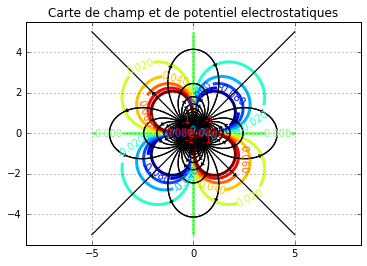

In [2]:

Vmin = -.1;
Vmax = .1;	
NV = 10;
niveaux = np.linspace(Vmin,Vmax,NV+1,endpoint="true");


plt.figure();

# Dimensions de la zone de tracé [-Lx,Lx]x[-Ly,Ly]
Lx = 5;
Ly = 5;
delta = 0.01 ;# pas de la grille pour le tracé des équipotentielles
npoints = 32; # nombres de ligne de champ à faire démarrer de chaque charge
d = 0.1; # distance de départ et d'arrêt de chaque de ligne de champ par rapport aux charges
l = 0.1;# taille de la flèche

# fonction potentiel électrostatique
def V(x,y):
	V=0
	for i in range(0,N):
		V += q[i]/np.sqrt((x-xq[i])**2+(y-yq[i])**2)
	return V;

# fonction champ électrique
def Ex(x,y):
	Ex = 0
	for i in range(0,N):
		Ex += q[i]/((x-xq[i])**2+(y-yq[i])**2)**1.5*(x-xq[i])
	return Ex;

def Ey(x,y):
	Ey = 0
	for i in range(0,N):
		Ey += q[i]/((x-xq[i])**2+(y-yq[i])**2)**1.5*(y-yq[i])
	return Ey;

# fonction tracé de flèches en x1,y1, d'angle alpha
def fleche(x1,y1,alpha):
	xfl = np.array([x1 + l*np.cos(.75*np.pi + alpha), x1, x1 + l*np.cos(-.75*np.pi + alpha)])
	yfl = np.array([y1 + l*np.sin(.75*np.pi + alpha), y1, y1 + l*np.sin(-.75*np.pi + alpha)])
	plt.plot(xfl, yfl, linewidth=1.2, color="black");


# fonction de tracé de lignes équipotentielles

Nlignes = 10000;	# nombre max d'itérations pour le tracé de la ligne de champ

def ligne(x0,y0,epsilon,i0): 	# (x0,y0) est le point de départ de la ligne de champ
	lx=[x0]
	ly=[y0]
	x = x0
	y = y0
	i = 0
	dist = 999999999999999.

	while (abs(x)<Lx and abs(y)<Ly and i<Nlignes and dist > d):
		i+=1
		Exx = Ex(x,y)
		Eyy = Ey(x,y)
		E = np.sqrt(Exx**2 + Eyy**2)	
		dx = Exx/E*delta*epsilon
		dy = Eyy/E*delta*epsilon
		x += dx
		y += dy
		dist = 99999999999.
		for j in range(0,N):
			if (j != i0):
				dist_j_i0 = np.sqrt( (x-xq[j])**2 + (y-yq[j])**2 )
				if (dist_j_i0 < dist):
					dist = dist_j_i0
	
		lx.append(x)
		ly.append(y)
	#print (i);
	
	# on trace la ligne de champ
	plt.plot(np.array(lx), np.array(ly), color="black",
             linewidth=1.2);
	# on trace deux flèches au 1/3 de la ligne
	x1 = lx[i//3]
	y1 = ly[i//3]
	cosalpha = Ex(x1,y1)/np.sqrt(Ex(x1,y1)**2 + Ey(x1,y1)**2)
	sinalpha = Ey(x1,y1)/np.sqrt(Ex(x1,y1)**2 + Ey(x1,y1)**2)
	if (sinalpha > 0):
		alpha = np.arccos(cosalpha)
	else:
		alpha = -np.arccos(cosalpha)
	fleche(x1,y1,alpha)	
	
# Calcule les points de départ des lignes de champ
def points_de_depart(N,xq,yq,d,npoints):
	for i in range(0,N):
		for j in range(0,npoints):
			x0 = xq[i] + d*np.sin(2*np.pi/npoints*j)
			y0 = yq[i] + d*np.cos(2*np.pi/npoints*j)
			ligne(x0,y0,abs(q[i])/q[i],i)


points_de_depart(N,xq,yq,d,npoints);

x = np.arange(-Lx,Lx,delta);
y = np.arange(-Ly,Ly,delta);
X, Y = np.meshgrid(x, y);

Z = V(X,Y);



for i in range(0,N):
	plt.text(xq[i]+.05,yq[i]+.05,"%s" % q[i], color="red");

plt.axis('equal');
plt.scatter(xq[0:N],yq[0:N]);
plt.grid();
CS = plt.contour(X, Y, Z, levels=niveaux, linewidths=3);
plt.clabel(CS, inline=1, fontsize=10);
plt.title('Carte de champ et de potentiel electrostatiques');
plt.plot()
#plt.savefig('PNG/Spe_cartes_electrostatiques.png')